In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Main objective here would be to minimize the false negatives in the credit card dataset**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/gdrive/My Drive/ML/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Describe the data (including means and standard deviations)
print("\nData description:")
print(df.describe())


Data description:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.

In [ ]:
# Check for missing values
print("Missing values summary:")
print(df.isnull().sum())

Missing values summary:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Check the class distribution (number of frauds vs. normal transactions)
fraud_count = len(df[df["Class"] == 1])
normal_count = len(df[df["Class"] == 0])
print(f"\nClass Distribution:")
print(f"  - Frauds: {fraud_count} ({fraud_count / len(df) * 100:.2f}%)")
print(f"  - Normal Transactions: {normal_count} ({normal_count / len(df) * 100:.2f}%)")



Class Distribution:
  - Frauds: 492 (0.17%)
  - Normal Transactions: 284315 (99.83%)


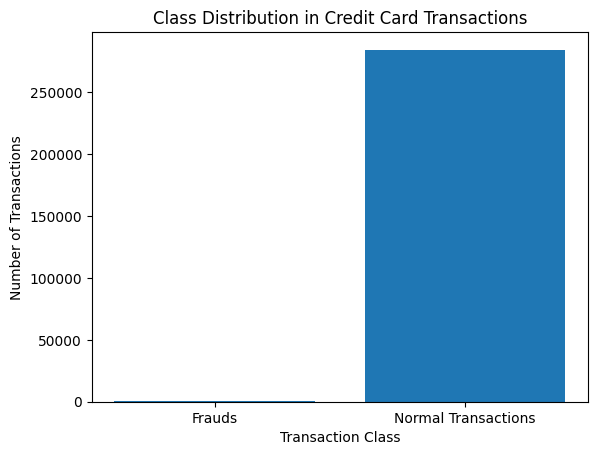

In [ ]:
import matplotlib.pyplot as plt

# Visualize class distribution with a bar chart
plt.bar(["Frauds", "Normal Transactions"], [fraud_count, normal_count])
plt.title("Class Distribution in Credit Card Transactions")
plt.xlabel("Transaction Class")
plt.ylabel("Number of Transactions")
plt.show()

In [ ]:
# Descriptive statistics (grouped by class)
fraud_stats = df[df["Class"] == 1].describe().transpose()  # Focus on fraud class
normal_stats = df[df["Class"] == 0].describe().transpose()  # Focus on normal class

# Print descriptive statistics side-by-side
print("Descriptive Statistics (Fraud vs. Normal)")
print(pd.concat([fraud_stats, normal_stats], axis=1))


Descriptive Statistics (Fraud vs. Normal)
        count          mean           std         min           25%  \
Time    492.0  80746.806911  47835.365138  406.000000  41241.500000   
V1      492.0     -4.771948      6.783687  -30.552380     -6.036063   
V2      492.0      3.623778      4.291216   -8.402154      1.188226   
V3      492.0     -7.033281      7.110937  -31.103685     -8.643489   
V4      492.0      4.542029      2.873318   -1.313275      2.373050   
V5      492.0     -3.151225      5.372468  -22.105532     -4.792835   
V6      492.0     -1.397737      1.858124   -6.406267     -2.501511   
V7      492.0     -5.568731      7.206773  -43.557242     -7.965295   
V8      492.0      0.570636      6.797831  -41.044261     -0.195336   
V9      492.0     -2.581123      2.500896  -13.434066     -3.872383   
V10     492.0     -5.676883      4.897341  -24.588262     -7.756698   
V11     492.0      3.800173      2.678605   -1.702228      1.973397   
V12     492.0     -6.259393      4.


T-test (Amount): t=3.0056, p-value=0.0027


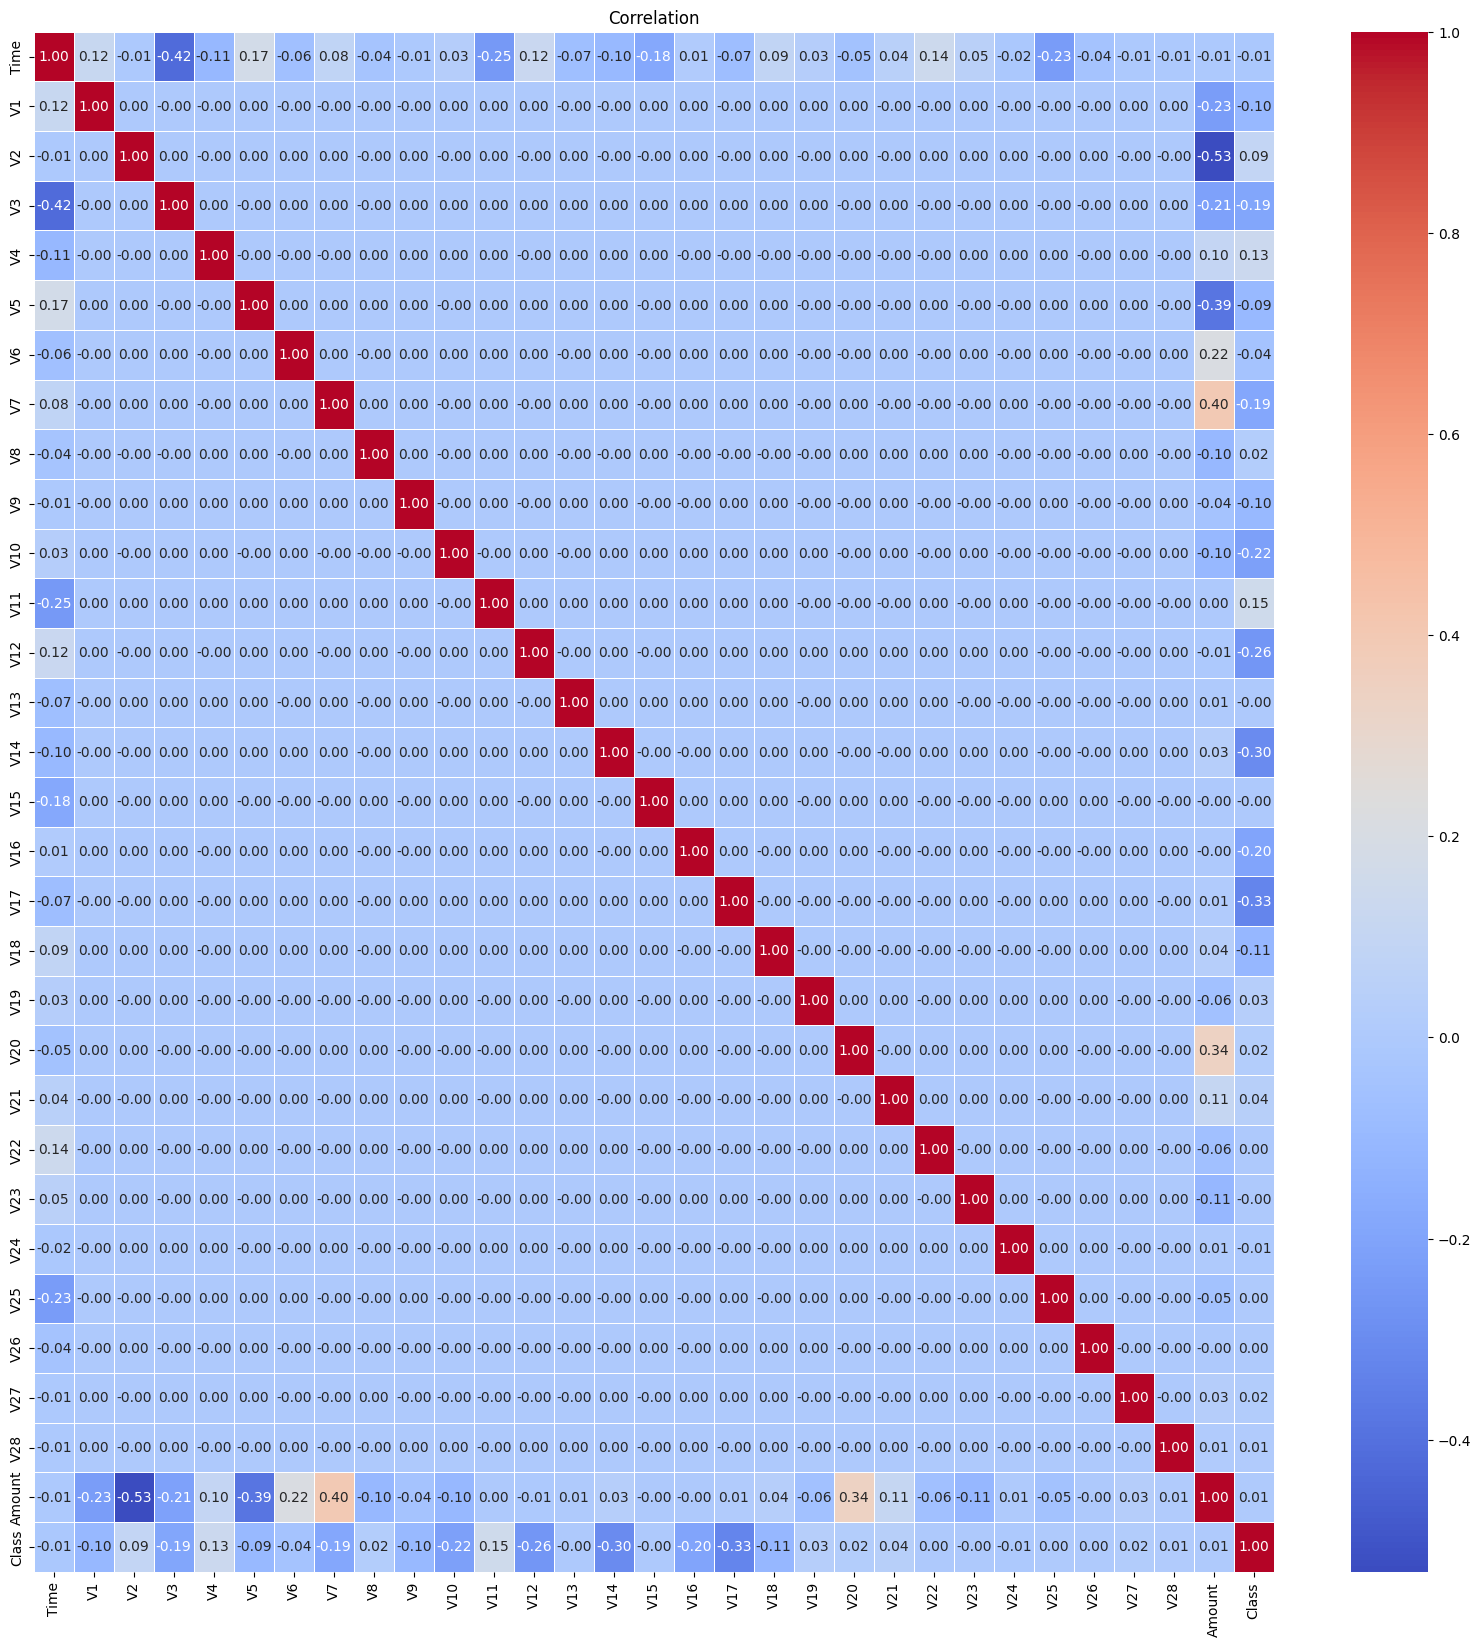

In [ ]:
#Grouped comparison (example: t-test for transaction amount)
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

amount_fraud = df[df["Class"] == 1]["Amount"]
amount_normal = df[df["Class"] == 0]["Amount"]
t_stat, p_value = ttest_ind(amount_fraud, amount_normal)

print(f"\nT-test (Amount): t={t_stat:.4f}, p-value={p_value:.4f}")  # Check for significance

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation')
plt.show()

**Analyzing if the features follow normal distribution**


*   All the variables observed values close to zero indicating strong evidence that the features don't follow normal distribution



In [ ]:
import seaborn as sns
# normality test
from scipy.stats import normaltest

X = df.drop('Class', axis=1)
X_nt = X.drop('Time', axis=1)
y = df[['Class']]

for column in X_nt.columns:
    stat, p = normaltest(X_nt[column])
    print(f'{column}: p={p}')

V1: p=0.0
V2: p=0.0
V3: p=0.0
V4: p=0.0
V5: p=0.0
V6: p=0.0
V7: p=0.0
V8: p=0.0
V9: p=0.0
V10: p=0.0
V11: p=0.0
V12: p=0.0
V13: p=2.4199736295043253e-126
V14: p=0.0
V15: p=0.0
V16: p=0.0
V17: p=0.0
V18: p=0.0
V19: p=0.0
V20: p=0.0
V21: p=0.0
V22: p=0.0
V23: p=0.0
V24: p=0.0
V25: p=0.0
V26: p=0.0
V27: p=0.0
V28: p=0.0
Amount: p=0.0


**To Understand the distribution of the variables in the dataset, we use "Box Plots" here**

The main objective here would be to observe and analyze -


*   Potential variablity in data among the given classes
*   Check the inter-quartile ranges for both the classes to see the spread of data
*   To mainly compare distribution of each feature with respect to classes in our dataset






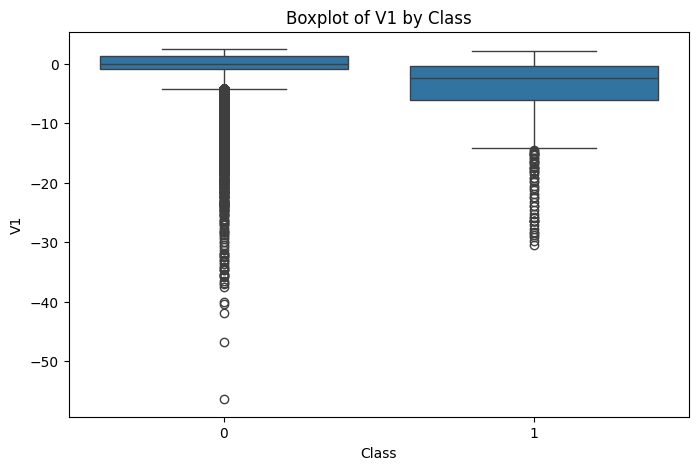

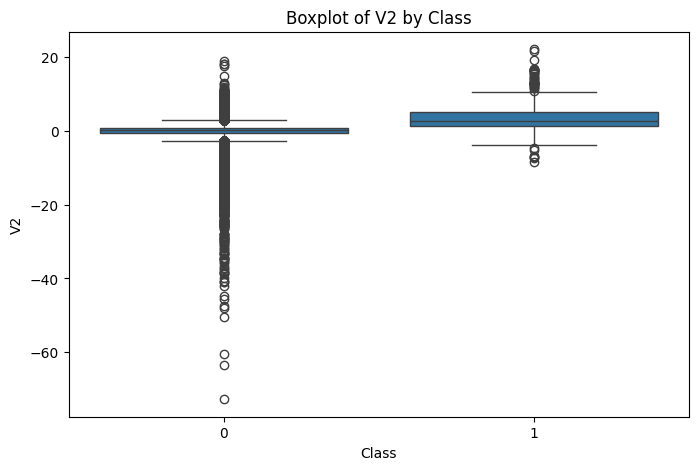

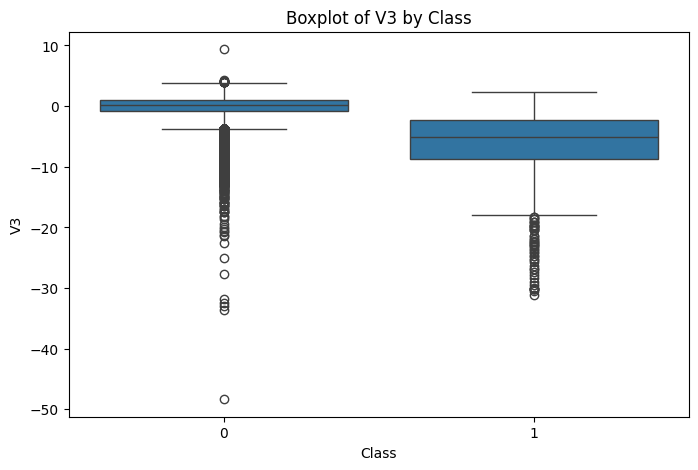

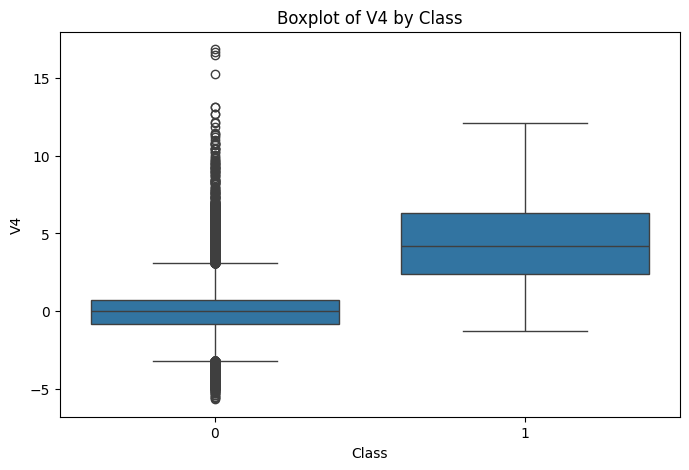

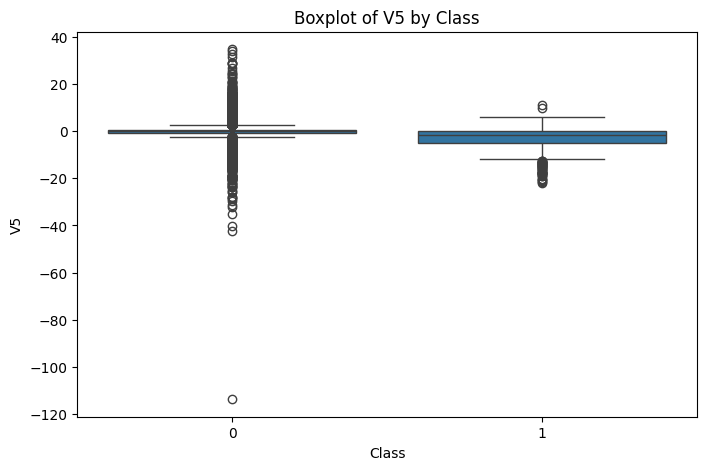

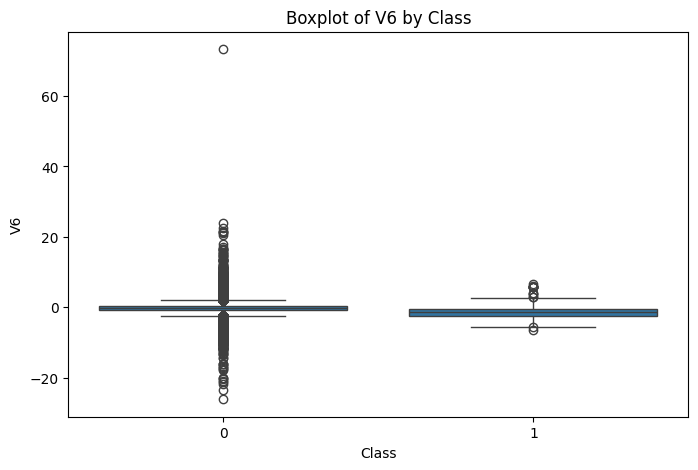

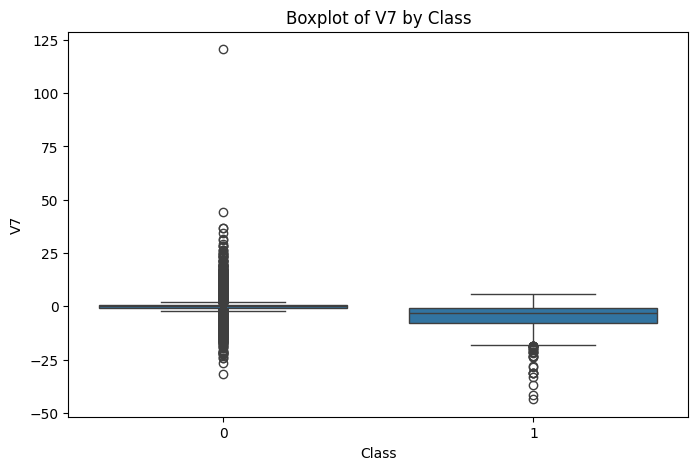

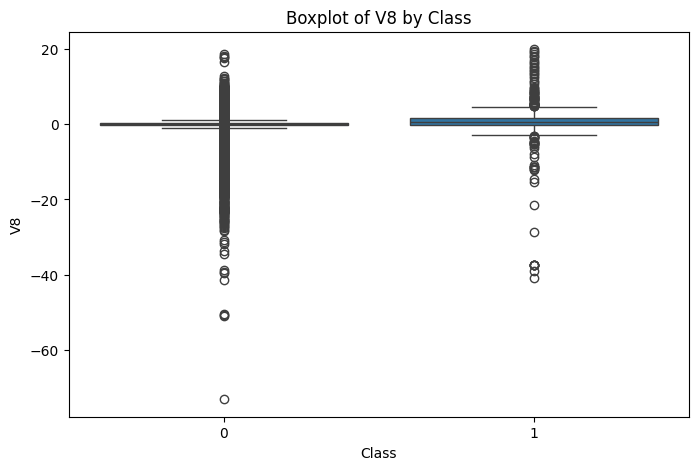

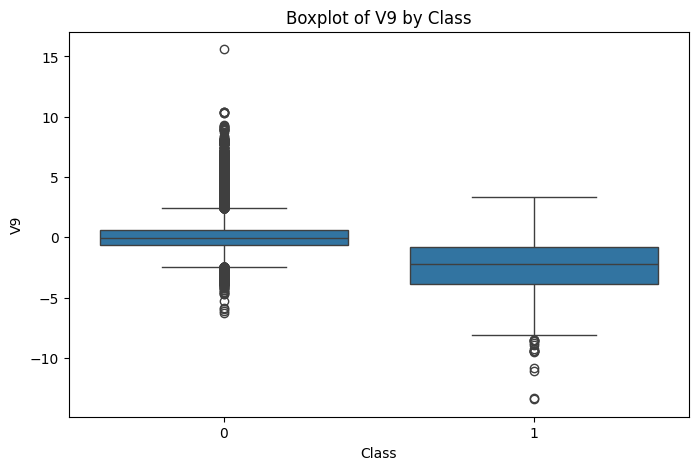

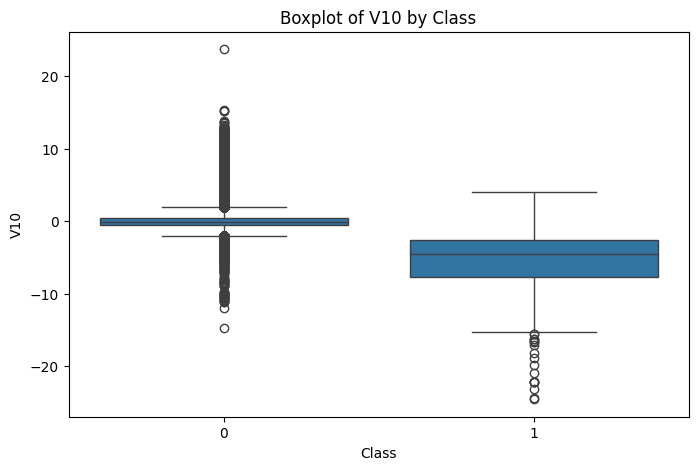

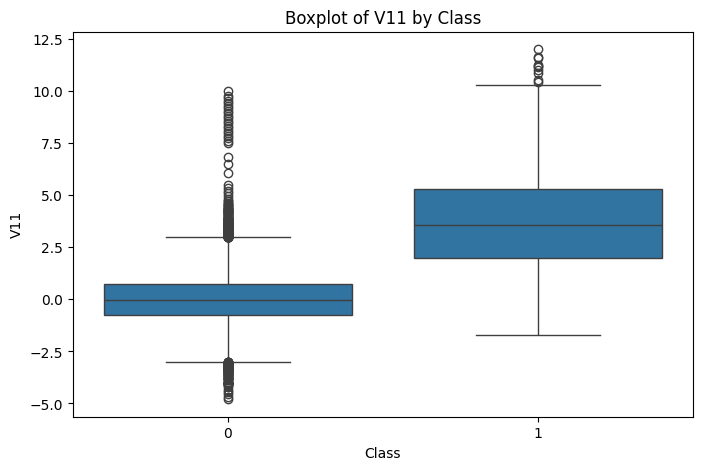

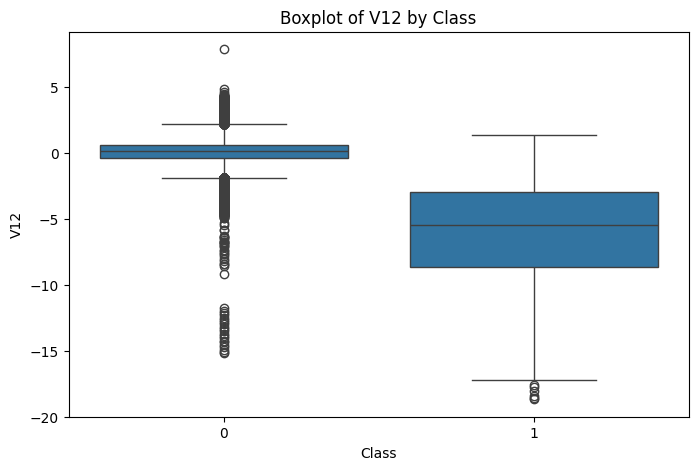

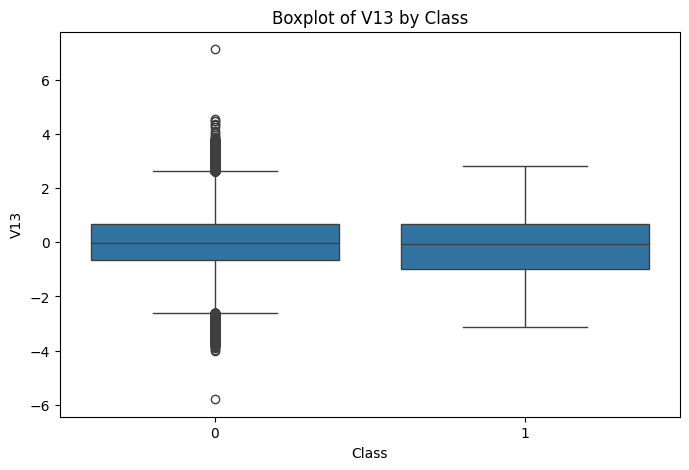

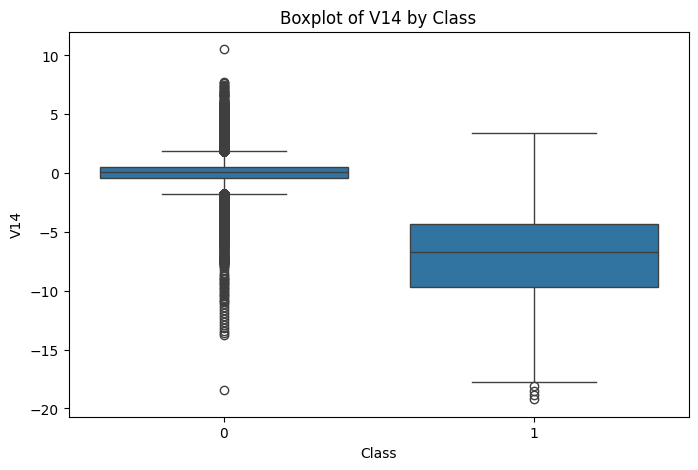

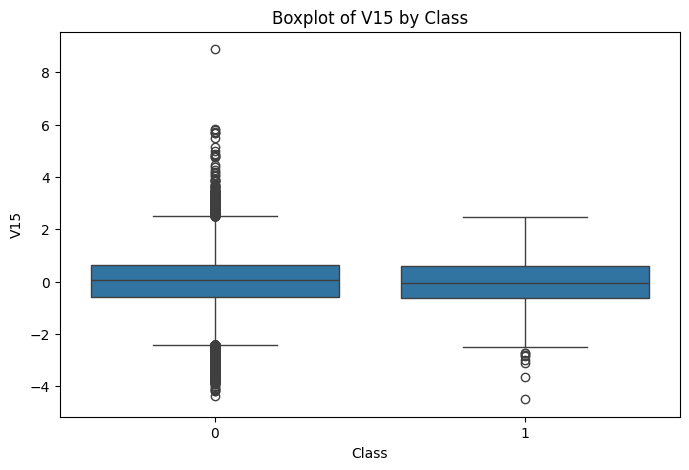

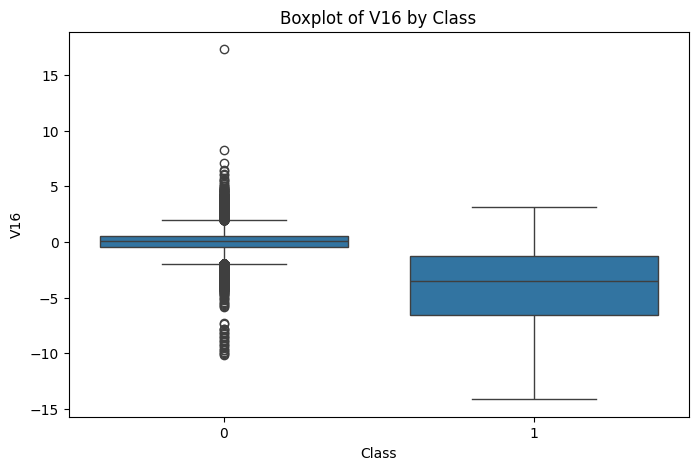

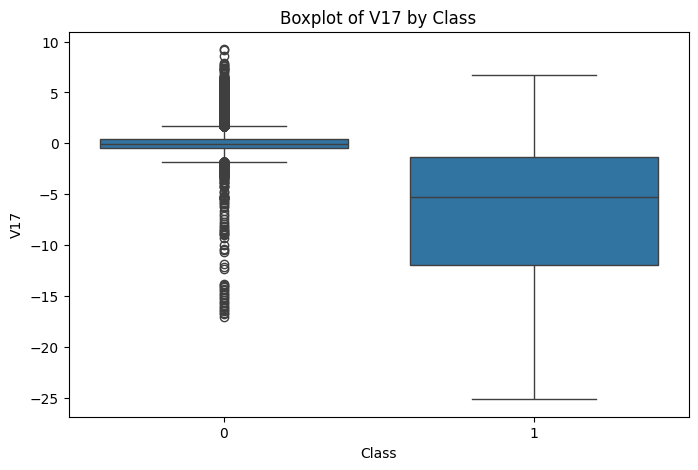

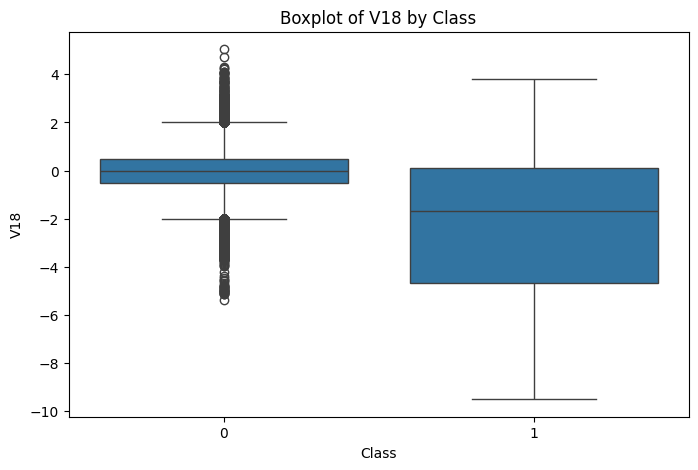

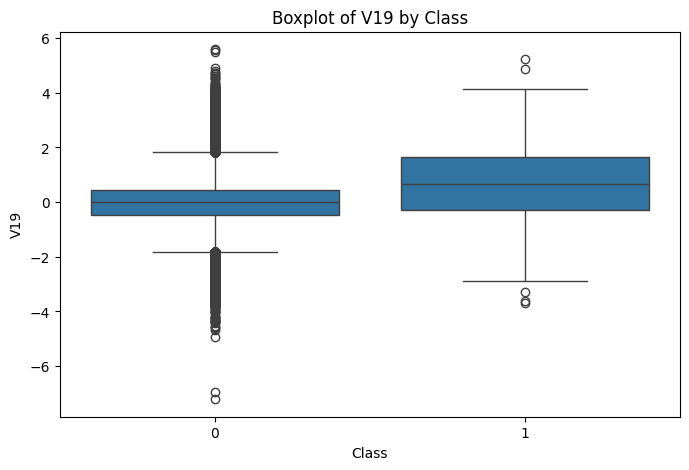

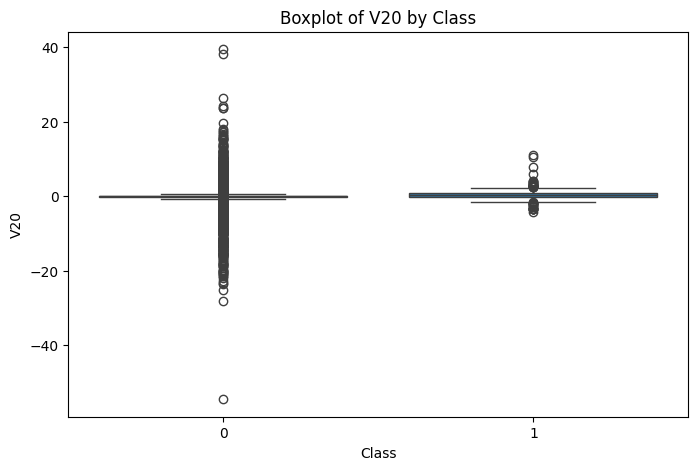

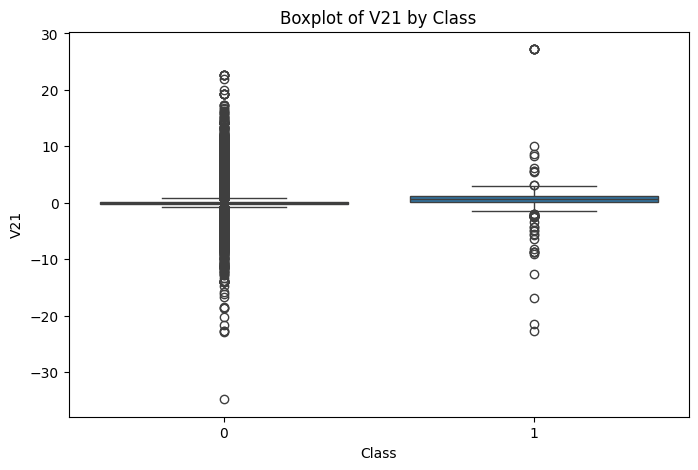

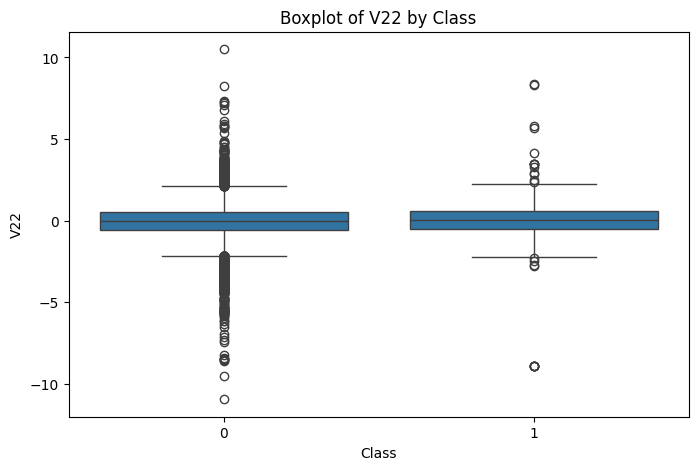

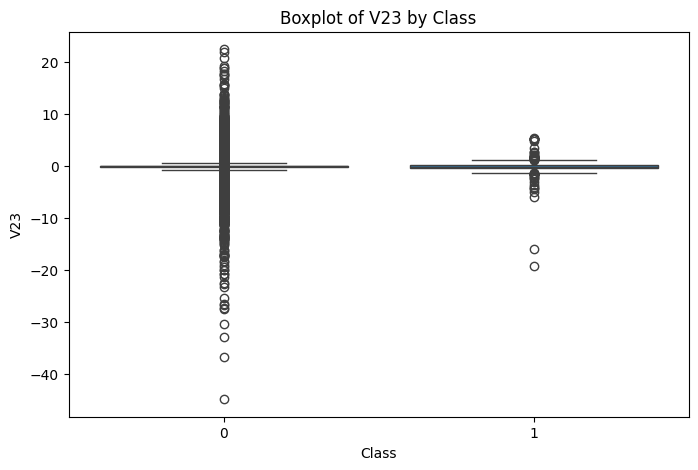

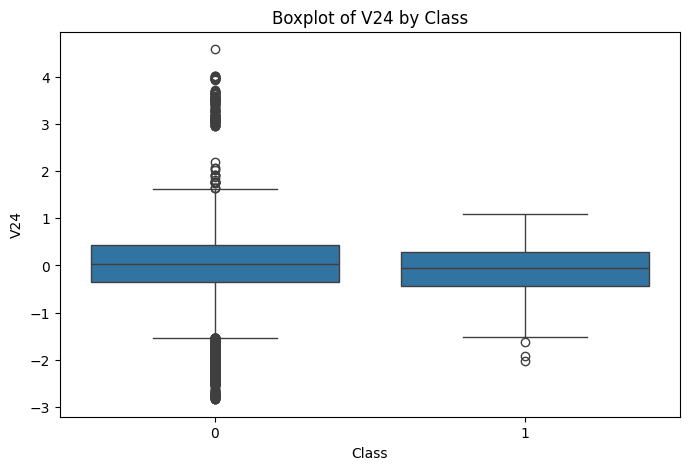

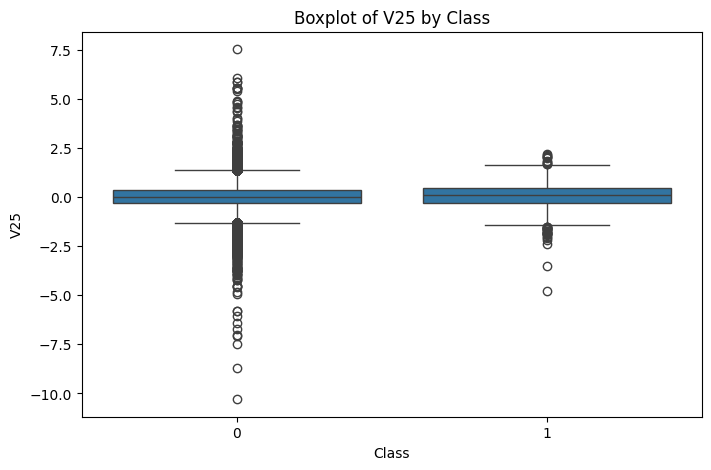

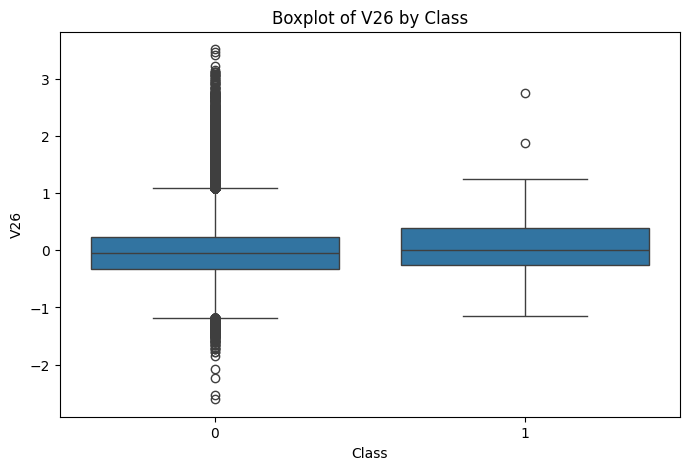

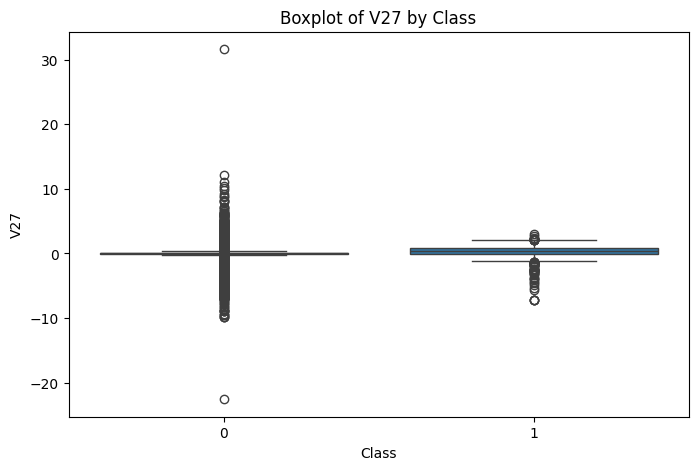

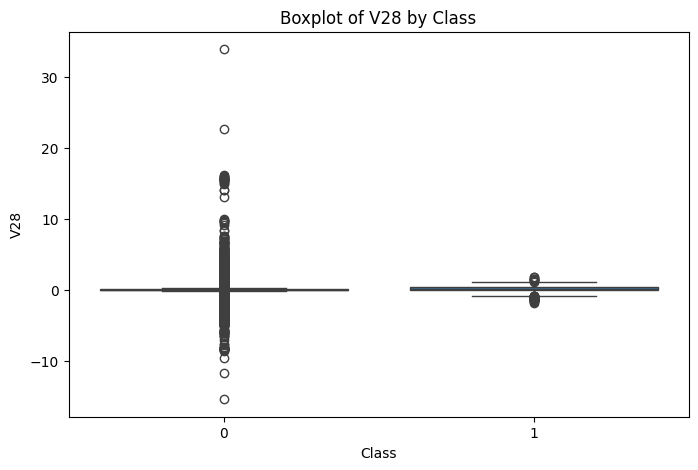

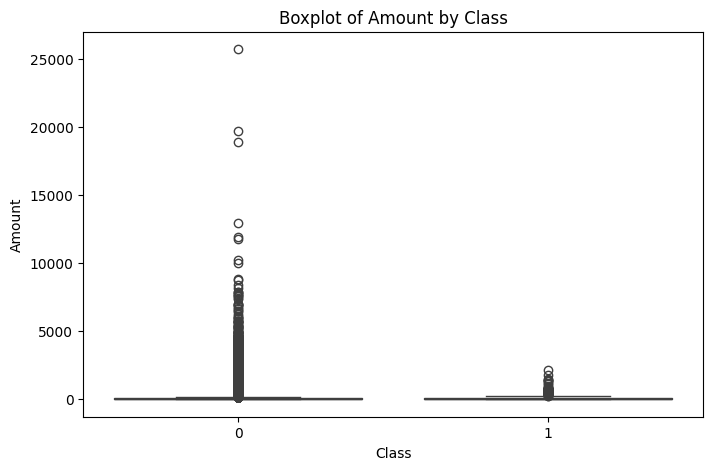

In [ ]:
# check distribution of all variables

for column in X_nt.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Class', y=column, data=df)
    plt.title(f'Boxplot of {column} by Class')
    plt.show()

In [ ]:
# check statistical difference in distributions between 2 classes with mann-whitney
from scipy import stats
from scipy.stats import mannwhitneyu

for column in X_nt.columns:
    class0 = df.loc[df['Class'] == 0, column]
    class1 = df.loc[df['Class'] == 1, column]
    stat, p = stats.ks_2samp(class0, class1)
    print(f'{column}: p={p}, ks_stat:{stat}')

V1: p=2.0484612390719802e-102, ks_stat:0.4753308729911244
V2: p=2.1638952381897888e-191, ks_stat:0.6332012800985509
V3: p=9.927579616294819e-245, ks_stat:0.7036817131004787
V4: p=2.040642212583566e-302, ks_stat:0.7664040757496016
V5: p=1.3455824269875895e-85, ks_stat:0.4364424249469092
V6: p=1.5172540850584156e-107, ks_stat:0.48642498894433045
V7: p=6.7768617871737065e-211, ks_stat:0.6605775627599584
V8: p=2.8418904392118e-60, ks_stat:0.36839471821375264
V9: p=4.388937518139933e-155, ks_stat:0.5763197781459903
V10: p=0.0, ks_stat:0.8042911367773263
V11: p=4.34750669760744e-292, ks_stat:0.7560672713721139
V12: p=8.607e-321, ks_stat:0.7839083782744691
V13: p=5.338333749512348e-05, ks_stat:0.10311905708614441
V14: p=0.0, ks_stat:0.8428391431180549
V15: p=0.036886244874065444, ks_stat:0.06341434104420712
V16: p=9.366542887299746e-231, ks_stat:0.6865061424913882
V17: p=1.3874110302831698e-281, ks_stat:0.7451726221445955
V18: p=1.1298000746161256e-115, ks_stat:0.5033604302682142
V19: p=1.538

**Since we have observed that the features do not follow normal distribution, performing "Mann-Whitney U" tests for each feature to observe statistical differences between the classes.**

In [ ]:
from scipy import stats
from scipy.stats import mannwhitneyu

#Performing Mann-Whitneyu test for each feature to observe statistical difference between both the classes
for feature in X_nt.columns:
    class0 = df.loc[df['Class'] == 0,feature]
    class1 = df.loc[df['Class'] == 1,feature]
    stat, p = stats.mannwhitneyu(class0, class1)
    print(f'{feature}: p-value={p}')

V1: p-value=1.74078470704578e-113
V2: p-value=1.6504376983790665e-163
V3: p-value=1.2110480361161294e-219
V4: p-value=3.625904437063816e-248
V5: p-value=3.0537119618414104e-58
V6: p-value=2.231002470170286e-93
V7: p-value=1.4642336565270678e-146
V8: p-value=8.50989149282899e-34
V9: p-value=8.943723386517164e-154
V10: p-value=9.611130933483015e-222
V11: p-value=4.910591830672246e-226
V12: p-value=8.416026601180421e-247
V13: p-value=0.051214811167866046
V14: p-value=1.4715806820794069e-260
V15: p-value=0.12950821497825638
V16: p-value=1.8081722832035591e-156
V17: p-value=9.219384389732435e-124
V18: p-value=2.6489619761287066e-77
V19: p-value=2.4019601988224717e-33
V20: p-value=1.1281043187424568e-30
V21: p-value=8.673354819194582e-80
V22: p-value=0.2663946500234552
V23: p-value=0.007419608511627531
V24: p-value=9.423065514108417e-07
V25: p-value=0.012462926236338216
V26: p-value=0.00353190452220665
V27: p-value=1.414589041975417e-51
V28: p-value=1.2036828471902098e-27
Amount: p-value=8.5

**Feature importance**


* To observe which feature contributes the most to the prediction of a model, we can use tree-based models like Random forest and gradient boosting classifier
* Using feature importance scores from the training model object, we can observe the impact of each feature on the model prediction

Using Random Forest and gradient Boosting Classifiers to get feature importance and getting the average of feature importance scores



In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

# Initialize tree-based models
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# Fit the models
rf_model.fit(X, y)
gb_model.fit(X, y)



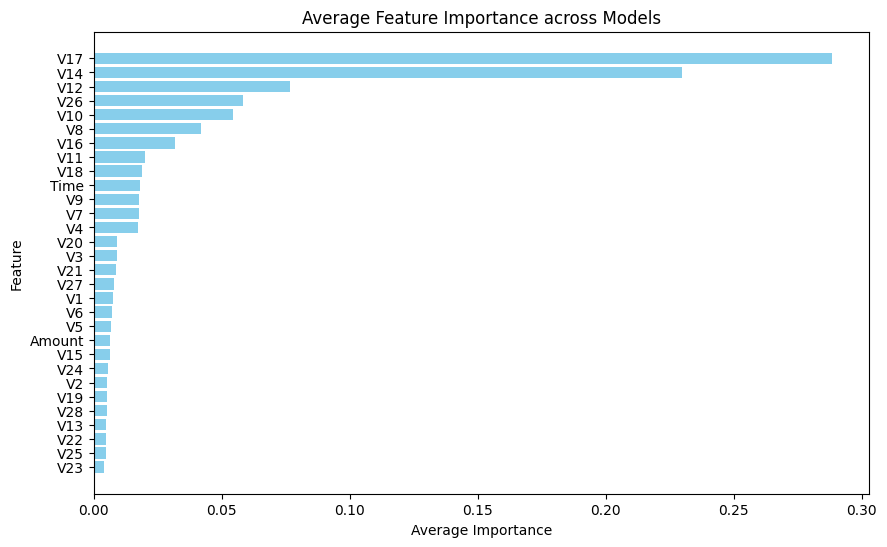

In [ ]:
import matplotlib.pyplot as plt

#Obtain feature importances
rf_feature_importance = rf_model.feature_importances_
gb_feature_importance = gb_model.feature_importances_

#Average of feature importances
average_feature_importance = np.mean([rf_feature_importance, gb_feature_importance], axis=0)

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest_Importance': rf_feature_importance,
    'GradientBoosting_Importance': gb_feature_importance,
    'Average_Importance': average_feature_importance
})

#Sorting by average importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Average_Importance', ascending=False)

#Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Average_Importance'], color='skyblue')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.title('Average Feature Importance across Models')
plt.gca().invert_yaxis()
plt.show()

#**Supervised Learning**


*   Balanced Random Forest Classifier
*   XgBoost
*   Multi-layer Perceptron





#*Balanced Random Forest Classifier*

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV

brf_clf = BalancedRandomForestClassifier(random_state=42)

# define the param grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# grid search
grid_search = GridSearchCV(estimator=brf_clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
y_pred=grid_search.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; T

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC on train: 0.9836652510653486
Brier score: 0.030823887232168046
ROC AUC on test: 0.9781147176794185

***Classification Report***
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


***Confusion Matrix***
Axes(0.125,0.11;0.62x0.77)


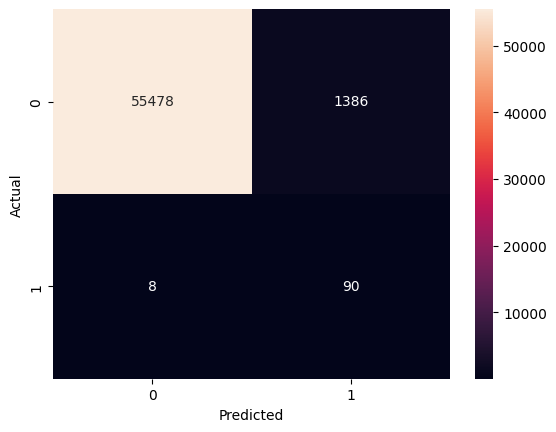

In [ ]:
# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC on train:", grid_search.best_score_)

# Get the probabilistic predictions for the positive class
y_probs = grid_search.predict_proba(X_test_scaled)[:, 1]

# eval
brier_score1 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score1)
roc_auc1 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc1)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred))
report1 = classification_report(y_test, y_pred, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

# XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#training-validation-testing split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

#Scaling
scaler = StandardScaler()

#Fit Scaled data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import xgboost as xgb

# Calculate the ratio of class 0 to class 1
cntclass_0, cntclass_1 = y_train.value_counts()
scale_pos_weight = cntclass_0 / cntclass_1

# xgbc with adjusted class weight
xgb_clf = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Fit the model with early stopping
eval_set = [(X_val_scaled, y_val)]
xgb_clf.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
y_pred = xgb_clf.predict(X_test_scaled)

# Get the probabilistic predictions for the positive class
y_probs = xgb_clf.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.45283
[1]	validation_0-logloss:0.31498
[2]	validation_0-logloss:0.23008
[3]	validation_0-logloss:0.17048
[4]	validation_0-logloss:0.12839
[5]	validation_0-logloss:0.09861
[6]	validation_0-logloss:0.07678
[7]	validation_0-logloss:0.05993
[8]	validation_0-logloss:0.04727
[9]	validation_0-logloss:0.03818
[10]	validation_0-logloss:0.03135
[11]	validation_0-logloss:0.02628
[12]	validation_0-logloss:0.02238
[13]	validation_0-logloss:0.01943
[14]	validation_0-logloss:0.01626
[15]	validation_0-logloss:0.01428
[16]	validation_0-logloss:0.01259
[17]	validation_0-logloss:0.01078
[18]	validation_0-logloss:0.00974
[19]	validation_0-logloss:0.00901
[20]	validation_0-logloss:0.00816
[21]	validation_0-logloss:0.00708
[22]	validation_0-logloss:0.00620
[23]	validation_0-logloss:0.00566
[24]	validation_0-logloss:0.00525
[25]	validation_0-logloss:0.00477
[26]	validation_0-logloss:0.00447
[27]	validation_0-logloss:0.00423
[28]	validation_0-logloss:0.00395
[29]	validation_0-loglos

Brier score: 0.0003498559932108418
ROC AUC on test: 0.9764731353289768

#######Classification Report#######
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


#######Confusion Matrix#######
Axes(0.125,0.11;0.62x0.77)


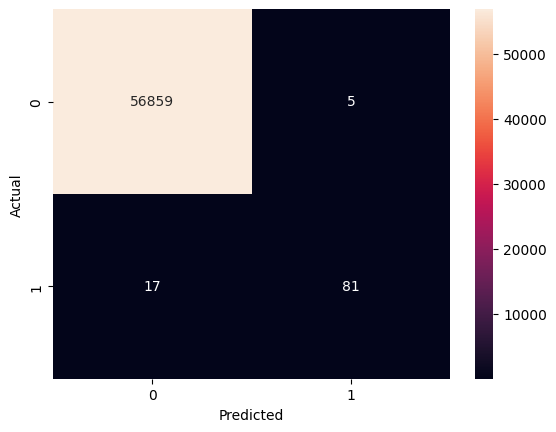

In [ ]:
#Evaluation of the training and testing data
#Analyzing brier scores for actual and prediction
brier_score1 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score1)

#Obtaining ROC AUC score
roc_auc_test = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc_test)

print()
print("#######Classification Report#######")
print(classification_report(y_test, y_pred))
classify_report = classification_report(y_test, y_pred, output_dict=True)

print()
print("#######Confusion Matrix#######")
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

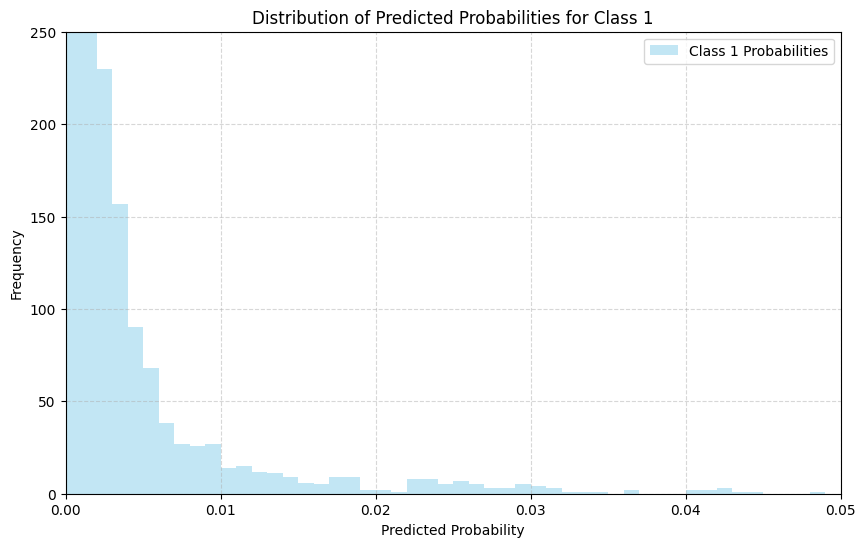

In [ ]:
# val set probs
y_valxgbprobs = xgb_clf.predict_proba(X_val_scaled)
y_val_probcl_1 = y_valxgbprobs[:, 1] # class 1 prob

plt.figure(figsize=(10, 6))

# Plot histogram to see class 1 prob distribution
plt.hist(y_val_probcl_1, bins=1000, alpha=0.5, color='skyblue', label='Class 1 Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Class 1')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.ylim(0, 250)
plt.xlim(0, 0.05)
plt.show()

In [ ]:
# find the threshold with the lowest FN when FP rate doesn't exceed 10%

from sklearn.metrics import confusion_matrix
import numpy as np

thresholds = [0.001, 0.02, 0.03, 0.08, 0.1,0.5,0.8]

best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    predictions = (y_val_probcl_1 > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val.values.ravel(), predictions).ravel()

    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, best threshold has the smallest FN
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")

Best Threshold: 0.001
Lowest FN (within FP constraint): 9


In [ ]:
# Adjust threshold
y_pred_threshxgb = (y_probs > best_threshold).astype(int)

Brier score: 0.0003498559932108418
ROC AUC on test: 0.9764731353289768

#######Classification Report#######
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.93      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


#######Confusion Matrix#######
Axes(0.125,0.11;0.62x0.77)


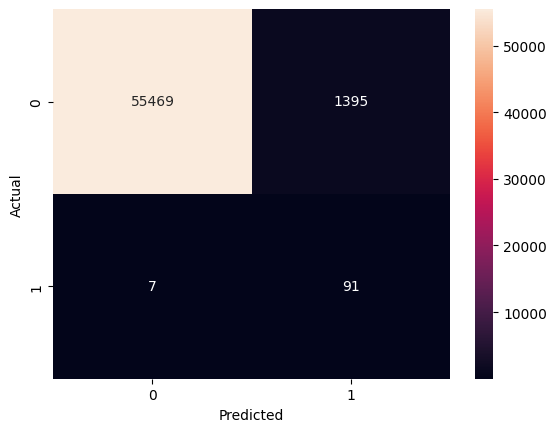

In [ ]:
#Evaluation of the training and testing data
#Analyzing brier scores for actual and prediction
brier_score_bestxgb = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score_bestxgb)

roc_auc_bestxgb = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc_bestxgb)
print()

print("#######Classification Report#######")
print(classification_report(y_test, y_pred_threshxgb))
report2 = classification_report(y_test, y_pred_threshxgb, output_dict=True)

print()
print("#######Confusion Matrix#######")
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred_threshxgb, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

#Multi_layer Perceptron

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.random.set_seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Class', axis=1)
y = df[['Class']]

# train test val split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Epoch 1/30
8543/8545 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9990 - auc: 0.9060
Epoch 1: val_loss improved from inf to 0.00311, saving model to best_MLP_model.h5
8545/8545 [==============================] - 27s 3ms/step - loss: 0.0073 - accuracy: 0.9990 - auc: 0.9060 - val_loss: 0.0031 - val_accuracy: 0.9995 - val_auc: 0.9099
Epoch 2/30
  90/8545 [..............................] - ETA: 14s - loss: 0.0033 - accuracy: 0.9994 - auc: 0.9962

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8535/8545 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9993 - auc: 0.9419
Epoch 2: val_loss did not improve from 0.00311
8545/8545 [==============================] - 23s 3ms/step - loss: 0.0035 - accuracy: 0.9993 - auc: 0.9419 - val_loss: 0.0031 - val_accuracy: 0.9996 - val_auc: 0.9101
Epoch 3/30
8541/8545 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9993 - auc: 0.9485
Epoch 3: val_loss improved from 0.00311 to 0.00280, saving model to best_MLP_model.h5
8545/8545 [==============================] - 22s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - auc: 0.9485 - val_loss: 0.0028 - val_accuracy: 0.9996 - val_auc: 0.9226
Epoch 4/30
8533/8545 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9994 - auc: 0.9565
Epoch 4: val_loss did not improve from 0.00280
8545/8545 [==============================] - 20s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - auc: 0.9565 - val_loss: 0.0029 - val_accuracy: 0.9996 - val_auc: 0.92

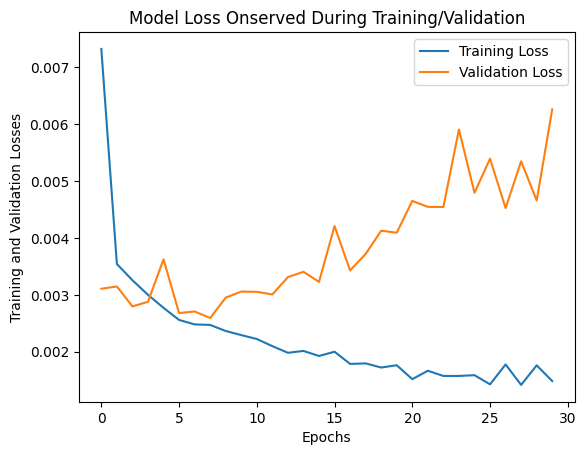

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# MLP model
model = Sequential([
    # 1st layer with 32 neurons
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    # 2nd layer with 32 neurons
    Dense(32, activation='relu'),
    # add dropout for regularization
    Dropout(0.2),
    # output layer
    Dense(1, activation='sigmoid')
])

# Compile the model (adam lr 0.001 is default)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', AUC()])

# save model with lowest val loss
model_checkpoint_callback = ModelCheckpoint(
    filepath='best_MLP_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# train model
epochs_hist = model.fit(X_train_scaled, y_train, epochs=30, batch_size=20, verbose=1, validation_data=(X_val_scaled, y_val), callbacks=[model_checkpoint_callback])

# Plot the train and validation loss
plt.plot(epochs_hist.history['loss']) # Training loss
plt.plot(epochs_hist.history['val_loss']) # Validation loss
plt.title('Model Loss Onserved During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])

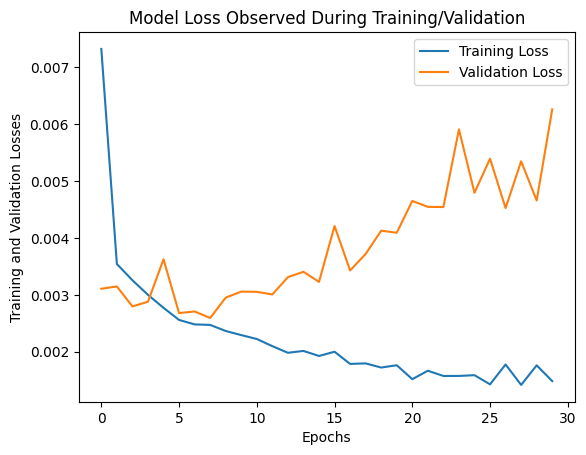

In [ ]:
# Plot the train and validation loss
plt.plot(epochs_hist.history['loss']) # Training loss
plt.plot(epochs_hist.history['val_loss']) # Validation loss
plt.title('Model Loss Observed During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epochs')
plt.legend(['Training Loss','Validation Loss'])

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
mlp_model = load_model('best_MLP_model.h5')

# Eval test set
test_loss, test_acc, test_auc = mlp_model.evaluate(X_test_scaled, y_test, verbose=1)

1781/1781 [==============================] - 6s 3ms/step - loss: 0.0031 - accuracy: 0.9995 - auc_2: 0.9485


In [ ]:
validation_probs = model.predict(X_val_scaled)

1781/1781 [==============================] - 7s 4ms/step


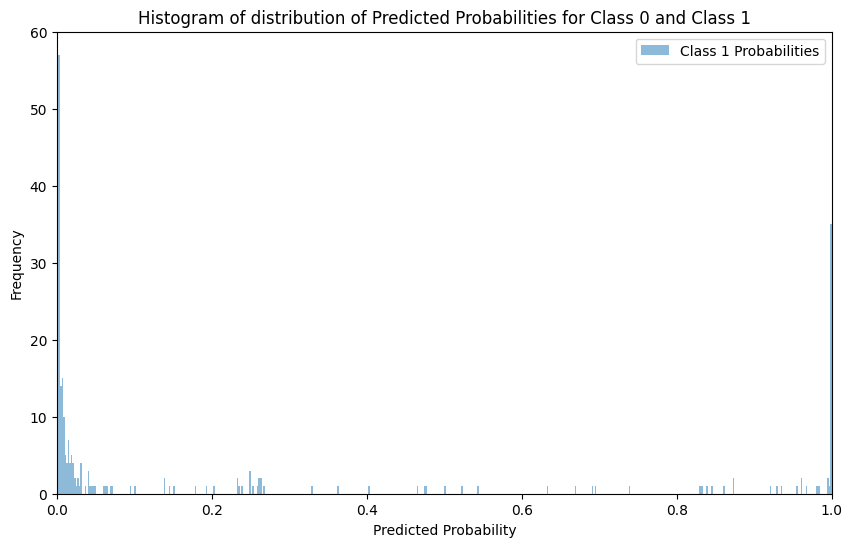

In [ ]:
# Determine optimal threshold based on val prob distribution

plt.figure(figsize=(10, 6))

# Plot histogram to see class 1 prob distribution
plt.hist(validation_probs, bins=500, alpha=0.5, label='Class 1 Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of distribution of Predicted Probabilities for Class 0 and Class 1')
plt.legend(loc='best')
plt.ylim(0, 60)
plt.xlim(0, 1)
plt.show()

In [ ]:
import numpy as np

# find the threshold with the lowest FN when FP rate doesn't exceed 10%

from sklearn.metrics import confusion_matrix
thresholds = [0.0001,0.0002, 0.005, 0.0009, 0.001, 0.002, 0.004,0.008,0.01]

best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    predictions = (validation_probs > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val.values.ravel(), predictions).ravel()

    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, best threshold has the smallest FN
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")

Best Threshold: 0.0001
Lowest FN (within FP constraint): 12


1781/1781 [==============================] - 6s 3ms/step
Brier score: 0.0004855308061116694
ROC AUC on test: 0.9549429788797905

#######Classification Report#######
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.87      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962


#######Confusion Matrix#######
Axes(0.125,0.11;0.62x0.77)


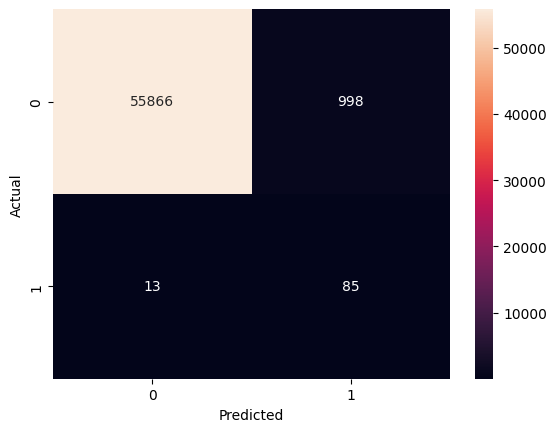

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np

# get probabilites
y_probs = model.predict(X_test_scaled).ravel()

# Adjust threshold
y_pred_threshmlp = (y_probs > best_threshold).astype(int)


#Evaluation of the training and testing data
#Analyzing brier scores for actual and prediction
brier_score_bestmlp = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score_bestmlp)

roc_auc_bestmlp = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc_bestmlp)
print()

print("#######Classification Report#######")
print(classification_report(y_test, y_pred_threshmlp))
report2 = classification_report(y_test, y_pred_threshmlp, output_dict=True)

print()
print("#######Confusion Matrix#######")
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred_threshmlp, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

#Unsupervised Learning


* PCA
* Autoencoders



# PCA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train test split
X = df.drop('Class', axis=1)
y = df[['Class']]

# train test val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling
scaler = StandardScaler()

#Fit scaled data
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc= scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

#PCA for training
pca_train = PCA(.95)
pca_train.fit(X_train_sc)
X_pca_train= pca_train.transform(X_train_sc)
X_train_afterpca = pca_train.inverse_transform(X_pca_train)

In [ ]:
#PCA for testing
pca_test = PCA(.95)
pca_test.fit(X_test_sc)
X_pca_test=pca_test.transform(X_test_sc)
X_test_afterpca = pca_test.inverse_transform(X_pca_test)

In [ ]:
import numpy as np

# Reconstruction error for training data
reconstruction_errors_train = np.mean(np.square(X_train_sc - X_train_afterpca), axis=1)

# Reconstruction error for testing data
reconstruction_errors_test = np.mean(np.square(X_test_sc - X_test_afterpca), axis=1)

print("Array of reconstruction errors for training data:", reconstruction_errors_train)
print("Array of reconstruction errors for testing data:", reconstruction_errors_test)


Array of reconstruction errors for training data: [0.00067682 0.0170322  0.00404767 ... 0.01579264 0.02313778 0.00146421]
Array of reconstruction errors for testing data: [0.40176375 0.02071838 0.01027901 ... 0.09523341 0.00378191 1.11064065]


In [ ]:
np.max(reconstruction_errors_train)

161.37383769752267

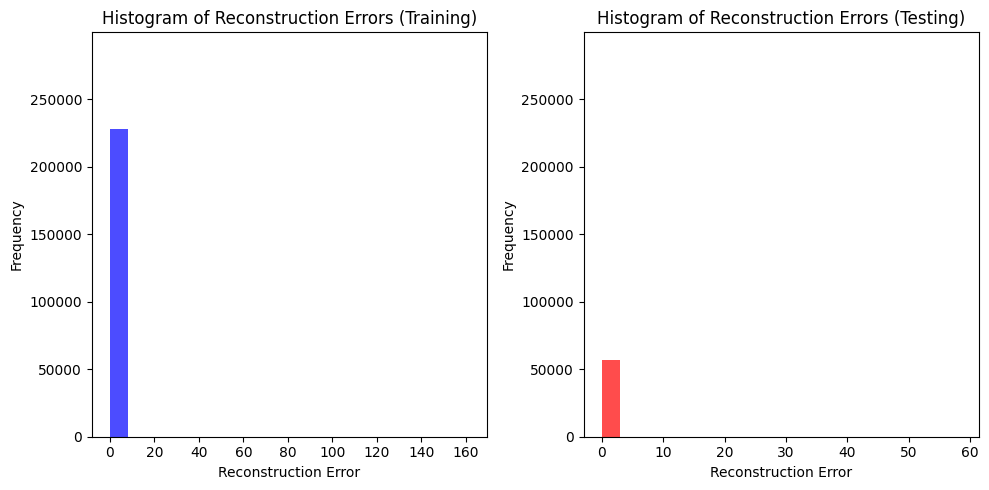

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate bin widths for x-axis
bin_width_train = (max(reconstruction_errors_train) - min(reconstruction_errors_train)) / 20
bin_width_test = (max(reconstruction_errors_test) - min(reconstruction_errors_test)) / 20

# Plot histograms of reconstruction errors
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(reconstruction_errors_train, bins=np.arange(min(reconstruction_errors_train), max(reconstruction_errors_train) + bin_width_train, bin_width_train), color='blue', alpha=0.7)
plt.title('Histogram of Reconstruction Errors (Training)')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.ylim(0, max(len(np.histogram(reconstruction_errors_train, bins='auto')[0]), len(np.histogram(reconstruction_errors_test, bins='auto')[0])))

plt.subplot(1, 2, 2)
plt.hist(reconstruction_errors_test, bins=np.arange(min(reconstruction_errors_test), max(reconstruction_errors_test) + bin_width_test, bin_width_test), color='red', alpha=0.7)
plt.title('Histogram of Reconstruction Errors (Testing)')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.ylim(0, max(len(np.histogram(reconstruction_errors_train, bins='auto')[0]), len(np.histogram(reconstruction_errors_test, bins='auto')[0])))

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the 99th percentile threshold
threshold_train = np.percentile(reconstruction_errors_train, 99)
threshold_test = np.percentile(reconstruction_errors_test, 99)

# Identify outliers
outliers_train = reconstruction_errors_train[reconstruction_errors_train > threshold_train]
outliers_test = reconstruction_errors_test[reconstruction_errors_test > threshold_test]

print("99th percentile threshold for training data:", threshold_train)
print("Number of outliers in training data:", len(outliers_train))
print("99th percentile threshold for testing data:", threshold_test)
print("Number of outliers in testing data:", len(outliers_test))


99th percentile threshold for training data: 0.4245586025794436
Number of outliers in training data: 2279
99th percentile threshold for testing data: 0.430836731776997
Number of outliers in testing data: 570


In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train.values.ravel(), reconstruction_errors_train, pos_label=1)

# Find the threshold with lowest FN when FP rate doesn't exceed 10%
best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_train.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    # Count false positives and false negatives
    fp = np.sum((reconstruction_errors_train > threshold) & (y_train.values.ravel() == 0))
    fn = np.sum((reconstruction_errors_train <= threshold) & (y_train.values.ravel() == 1))

    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, update best threshold if FN is lower
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")


Best Threshold: 0.058385890724366535
Lowest FN (within FP constraint): 65


####Classification Report####
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.01      0.38      0.02        98

    accuracy                           0.92     56962
   macro avg       0.50      0.65      0.49     56962
weighted avg       1.00      0.92      0.96     56962


####Confusion Matrix####
Axes(0.125,0.11;0.62x0.77)


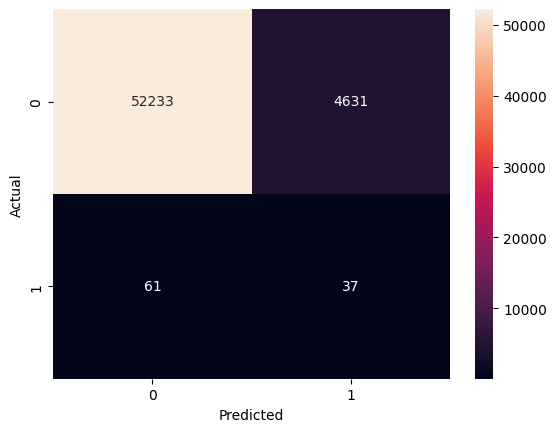

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np

# Use the best threshold on the test set
test_predictions = np.where(reconstruction_errors_test > best_threshold, 1, 0)

# Evaluate
print('####Classification Report####')
print(classification_report(y_test.values.ravel(), test_predictions))
report3 = classification_report(y_test.values.ravel(), test_predictions, output_dict=True)
print()
print('####Confusion Matrix####')
conf_matrix = pd.crosstab(y_test.values.ravel(), test_predictions, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))


Still Too many FN

#AutoEncoder

In [ ]:
X = df.drop('Class', axis=1)
y = df[['Class']]

# training-testing-validation split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

#scaling
scaler = StandardScaler()

#Scaling the data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

#Defining Autoencoder
custom_input_layer = Input(shape=(X_train.shape[1],))
custom_encoder = Dense(32, activation="relu")(custom_input_layer)
custom_decoder = Dense(X_train.shape[1], activation="sigmoid")(custom_encoder)

# Initialize model
custom_autoencoder = Model(custom_input_layer, custom_decoder)
custom_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
custom_autoencoder.fit(X_train_scaled,X_train_scaled,
                       epochs=50,
                       batch_size=256,
                       shuffle=True,
                       validation_data=(X_val_scaled, X_val_scaled))

# Calculate reconstruction error for validation
custom_reconstructed = custom_autoencoder.predict(X_val_scaled)
custom_mse_val = np.mean(np.power(X_val_scaled - custom_reconstructed, 2), axis=1)


Epoch 1/50
668/668 [==============================] - 4s 4ms/step - loss: 0.8795 - val_loss: 0.7116
Epoch 2/50
668/668 [==============================] - 3s 4ms/step - loss: 0.7243 - val_loss: 0.6725
Epoch 3/50
668/668 [==============================] - 5s 7ms/step - loss: 0.7002 - val_loss: 0.6567
Epoch 4/50
668/668 [==============================] - 2s 4ms/step - loss: 0.6877 - val_loss: 0.6470
Epoch 5/50
668/668 [==============================] - 2s 3ms/step - loss: 0.6801 - val_loss: 0.6412
Epoch 6/50
668/668 [==============================] - 2s 3ms/step - loss: 0.6754 - val_loss: 0.6376
Epoch 7/50
668/668 [==============================] - 2s 3ms/step - loss: 0.6726 - val_loss: 0.6356
Epoch 8/50
668/668 [==============================] - 4s 6ms/step - loss: 0.6711 - val_loss: 0.6346
Epoch 9/50
668/668 [==============================] - 3s 5ms/step - loss: 0.6703 - val_loss: 0.6340
Epoch 10/50
668/668 [==============================] - 2s 4ms/step - loss: 0.6699 - val_loss: 0.6336

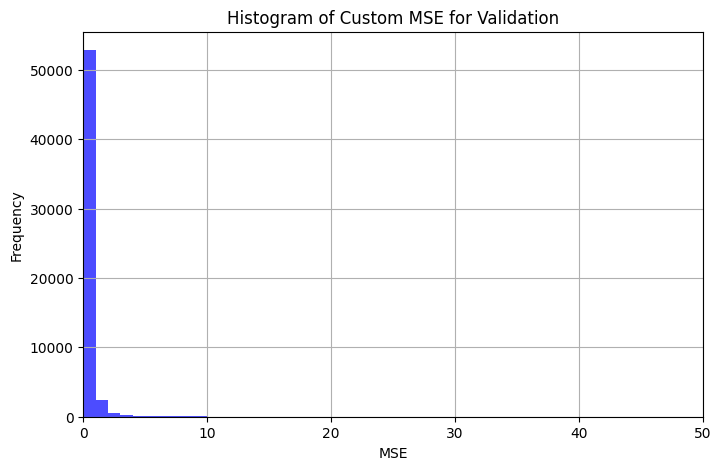

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of custom MSE for validation
plt.figure(figsize=(8, 5))
plt.hist(custom_mse_val, bins=range(0, 51), color='blue', alpha=0.7)
plt.title('Histogram of Custom MSE for Validation')
plt.xlabel('MSE')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Set x-axis range from 0 to 50
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr_custom, tpr_custom, thresholds_custom = roc_curve(y_val.values.ravel(), custom_mse_val, pos_label=1)

# Find the threshold with lowest FN when FP rate doesn't exceed 10%
best_threshold_custom = None
lowest_FN_custom = np.inf
max_allowed_FP_custom = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

# Iterate over thresholds to find the best one
for i, threshold_custom in enumerate(thresholds_custom):
    # Compute false positive and false negative counts
    fp_custom = np.sum((custom_mse_val > threshold_custom) & (y_val.values.ravel() == 0))
    fn_custom = np.sum((custom_mse_val <= threshold_custom) & (y_val.values.ravel() == 1))

    # Check if false positive rate is below 10%
    if fp_custom <= max_allowed_FP_custom:
        # If FP rate is within the limit, update best threshold if FN is lower
        if fn_custom < lowest_FN_custom:
            lowest_FN_custom = fn_custom
            best_threshold_custom = threshold_custom

# Output the results
print(f"Best Threshold: {best_threshold_custom}")
print(f"Lowest FN (within FP constraint): {lowest_FN_custom}")


Best Threshold: 1.751307629182103
Lowest FN (within FP constraint): 12


In [ ]:
# calculate reconstruction error for test
y_predicted_autoenc = custom_autoencoder.predict(X_test_scaled)
mse_test_pred_autoenc = np.mean(np.power(X_test_scaled - y_predicted_autoenc, 2), axis=1)

1781/1781 [==============================] - 4s 2ms/step


***Classification Report***
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.86      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.97      0.98     56962


***Confusion Matrix***
Axes(0.125,0.11;0.62x0.77)


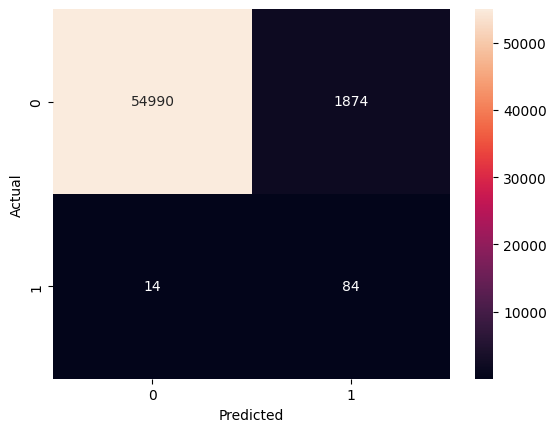

In [ ]:
# use this threshold on the test set

test_predictions = np.where(mse_test_pred_autoenc > best_threshold_custom, 1, 0)

# eval
print('***Classification Report***')
print(classification_report(y_test.values.ravel(), test_predictions))
report3 = classification_report(y_test.values.ravel(), test_predictions, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.values.ravel(), test_predictions, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

#Xgboost- Feature Selection

As observed from statistical difference Mann-Whitney U test, "V13", "V15" and "V22" are the features which do not show statistical difference between classes. So, we can drop them and try fitting the model to achieve minimal False Negatives

In [ ]:
# drop 'V13','V15','V22' since they are not statisitcally significantly different across classes
X = df.drop(['Class','V13','V15','V22'], axis=1)
y = df[['Class']]

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train test val split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Calculate the ratio of class 0 to class 1
count_class_0, count_class_1 = y_train.value_counts()
scale_pos_weight = count_class_0 / count_class_1

# xgbc with adjusted class weight
xgbc = xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

# Fit the model with early stopping
eval_set = [(X_val_scaled, y_val)]
xgbc.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
y_pred = xgbc.predict(X_test_scaled)

# Get the probabilistic predictions for the positive class
y_probs = xgbc.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.45127
[1]	validation_0-logloss:0.31434
[2]	validation_0-logloss:0.22543
[3]	validation_0-logloss:0.16567
[4]	validation_0-logloss:0.12495
[5]	validation_0-logloss:0.09593
[6]	validation_0-logloss:0.07330
[7]	validation_0-logloss:0.05715
[8]	validation_0-logloss:0.04524
[9]	validation_0-logloss:0.03610
[10]	validation_0-logloss:0.02959
[11]	validation_0-logloss:0.02477
[12]	validation_0-logloss:0.02102
[13]	validation_0-logloss:0.01811
[14]	validation_0-logloss:0.01539
[15]	validation_0-logloss:0.01296
[16]	validation_0-logloss:0.01140
[17]	validation_0-logloss:0.01028
[18]	validation_0-logloss:0.00909
[19]	validation_0-logloss:0.00807
[20]	validation_0-logloss:0.00758
[21]	validation_0-logloss:0.00669
[22]	validation_0-logloss:0.00602
[23]	validation_0-logloss:0.00570
[24]	validation_0-logloss:0.00539
[25]	validation_0-logloss:0.00514
[26]	validation_0-logloss:0.00487
[27]	validation_0-logloss:0.00449
[28]	validation_0-logloss:0.00412
[29]	validation_0-loglos

Brier score: 0.0003517326350156852
ROC AUC on test: 0.9801333184511847

***Classification Report***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962


***Confusion Matrix***
Axes(0.125,0.11;0.62x0.77)


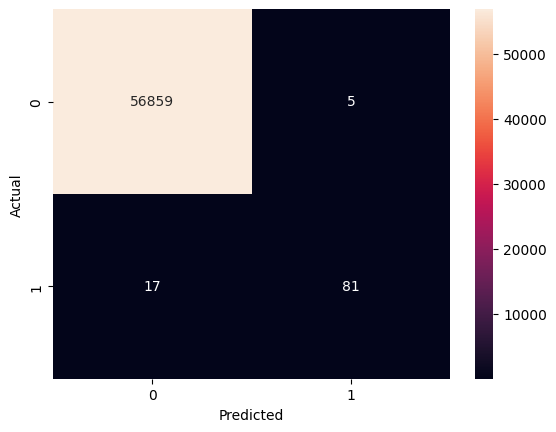

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score
import seaborn as sns

# eval
brier_score2 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score2)
roc_auc2 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc2)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred))
report2 = classification_report(y_test, y_pred, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))

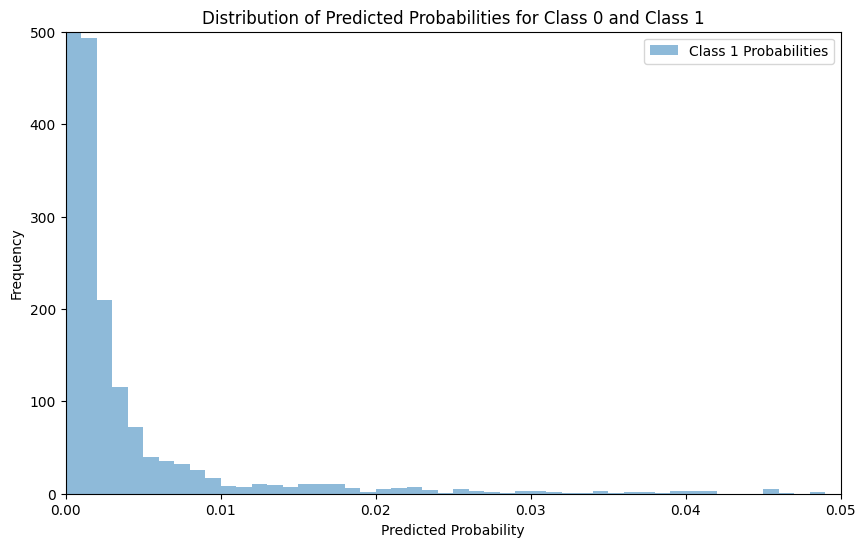

In [ ]:
import matplotlib.pyplot as plt
probs = xgbc.predict_proba(X_val_scaled) # val set probs
probs_class_1 = probs[:, 1] # class 1 prob

plt.figure(figsize=(10, 6))

# Plot histogram to see class 1 prob distribution
plt.hist(probs_class_1, bins=1000, alpha=0.5, label='Class 1 Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Class 0 and Class 1')
plt.legend(loc='best')
plt.ylim(0, 500)
plt.xlim(0, 0.05)
plt.show()

In [ ]:
# find the threshold with the lowest FN when FP rate doesn't exceed 10%

from sklearn.metrics import confusion_matrix
import numpy as np

thresholds = [0.001, 0.02, 0.03, 0.08, 0.1,0.5,0.8]

best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

for threshold in thresholds:
    predictions = (probs_class_1 > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val.values.ravel(), predictions).ravel()

    # Check if FP is below 10%
    if fp <= max_allowed_FP:
        # If FP is within the limit, best threshold has the smallest FN
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")

Best Threshold: 0.001
Lowest FN (within FP constraint): 10


In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val.values.ravel(), probs_class_1)

# Find the threshold with lowest FN when FP rate doesn't exceed 10%
best_threshold = None
lowest_FN = np.inf
max_allowed_FP = 0.1 * np.sum(y_val.values.ravel() == 0)  # 10% of all true negatives

# Iterate over thresholds to find the best one
for i, threshold in enumerate(thresholds):
    # Compute false positive and false negative counts
    predictions = (probs_class_1 > threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_val.values.ravel(), predictions).ravel()

    # Check if false positive rate is below 10%
    if fp <= max_allowed_FP:
        # If FP rate is within the limit, update best threshold if FN is lower
        if fn < lowest_FN:
            lowest_FN = fn
            best_threshold = threshold

# Output the results
print(f"Best Threshold: {best_threshold}")
print(f"Lowest FN (within FP constraint): {lowest_FN}")


Best Threshold: 0.0001831615954870358
Lowest FN (within FP constraint): 7


In [ ]:
# Adjust threshold
y_pred_adj = (y_probs > best_threshold).astype(int)

Brier score: 0.0003517326350156852
ROC AUC on test: 0.9801333184511847

***Classification Report***
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     56864
           1       0.02      0.94      0.05        98

    accuracy                           0.93     56962
   macro avg       0.51      0.94      0.51     56962
weighted avg       1.00      0.93      0.96     56962


***Confusion Matrix***
Axes(0.125,0.11;0.62x0.77)


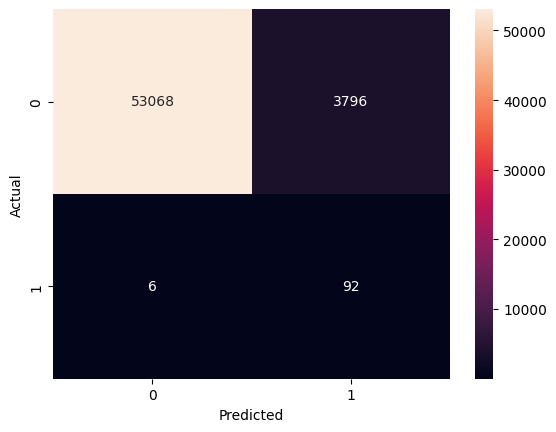

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

brier_score2 = brier_score_loss(y_test, y_probs)
print("Brier score:", brier_score2)
roc_auc2 = roc_auc_score(y_test, y_probs)
print("ROC AUC on test:", roc_auc2)
print()
print('***Classification Report***')
print(classification_report(y_test, y_pred_adj))
report2 = classification_report(y_test, y_pred_adj, output_dict=True)
print()
print('***Confusion Matrix***')
conf_matrix = pd.crosstab(y_test.iloc[:, 0], y_pred_adj, rownames=['Actual'], colnames=['Predicted'])
print(sns.heatmap(conf_matrix, annot=True, fmt="d"))